# Modeling 
- Alcohol vs Sulphates
- Free sulfur dioxide vs Total sulfur dioxide
- Volatile acidity vs density
- Citric Acid vs pH

In [1]:
# normal imports
import final_wrangle as wr
import final_explore as ex

In [2]:
# imports for kmeans:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

from sklearn.preprocessing import MinMaxScaler

In [3]:
# import the wine datafram: 
df = wr.wine_df()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
# clean the data
clean_df = wr.clean_wine(wr.wine_df())

In [5]:
# remove the outliers
clean_df = wr.remove_outliers(clean_df, 3)

In [6]:
# split the data into train validate and test:
target = 'quality'
train, validate, test = wr.split_data(clean_df, target)

In [7]:
# drop column: 
del clean_df['wine_color']
del train['wine_color']
del validate['wine_color']
del test['wine_color']

In [8]:
# scale the data: 
to_scale = list(clean_df.columns)
train, validate, test = wr.scale_data(train, validate, test, to_scale)

# Cluster 1: 
- Alcohol vs Sulphates

In [9]:
X1 = train[['alcohol', 'sulphates']]
X1.head()

#make the thing: 
kmeans = KMeans(n_clusters= 4 )

#fit the thing (ONLY ON TRAIN)
kmeans.fit(X1)

#Use the thing:
kmeans.predict(X1)

array([2, 1, 0, ..., 2, 1, 1], dtype=int32)

In [10]:
# make a new column names cluster in train and X dataframe

train['cluster_1'] = kmeans.predict(X1)

X1['cluster_1'] = kmeans.predict(X1)

train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1
621,0.571429,0.585366,0.2875,0.110020,0.556452,0.117117,0.287834,0.659886,0.465517,0.475610,0.225806,0.333333,1.0,2
3092,0.545455,0.317073,0.6125,0.330059,0.193548,0.342342,0.513353,0.405594,0.336207,0.182927,0.693548,0.833333,0.0,1
5926,0.337662,0.195122,0.3250,0.298625,0.362903,0.414414,0.519288,0.518754,0.327586,0.329268,0.241935,0.333333,0.0,0
661,0.480519,0.414634,0.3875,0.039293,0.572581,0.126126,0.103858,0.672600,0.491379,0.500000,0.161290,0.333333,1.0,2
1140,0.454545,0.390244,0.3750,0.043222,0.572581,0.288288,0.213650,0.615385,0.577586,0.512195,0.241935,0.500000,1.0,2


Cluster 1: Validate


<Axes: xlabel='alcohol', ylabel='sulphates'>

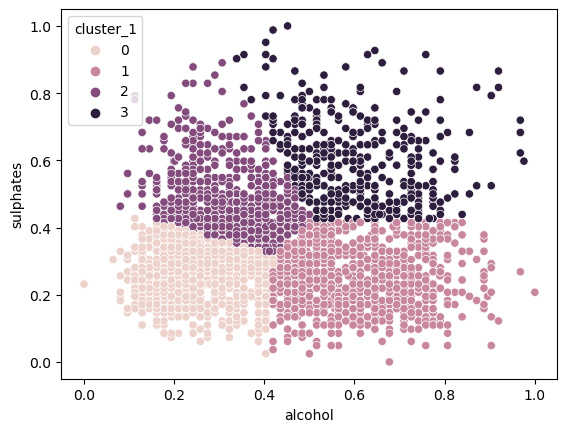

In [11]:
# visualize the clusters: 
sns.scatterplot(x = 'alcohol', y = 'sulphates', data = train, hue = 'cluster_1')

In [12]:
V1 = validate[['alcohol', 'sulphates']]

#use the thing:  
kmeans.predict(V1)

validate['cluster_1'] = kmeans.predict(V1)

#add columns
V1['cluster_1'] = kmeans.predict(V1)

validate.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1
5258,0.207792,0.548780,0.2000,0.082515,0.217742,0.297297,0.359050,0.085188,0.396552,0.365854,0.838710,0.833333,0.0,1
1531,0.298701,0.762195,0.1250,0.086444,0.580645,0.108108,0.062315,0.577877,0.741379,0.524390,0.354839,0.333333,1.0,2
849,0.337662,0.670732,0.2625,0.039293,0.572581,0.099099,0.074184,0.614749,0.724138,0.524390,0.290323,0.333333,1.0,2
5709,0.493506,0.390244,0.3375,0.023576,0.354839,0.198198,0.551929,0.280992,0.413793,0.182927,0.580645,0.333333,0.0,1
5206,0.389610,0.073171,0.2250,0.031434,0.306452,0.261261,0.246291,0.280992,0.456897,0.378049,0.516129,0.500000,0.0,1


In [13]:
T1 = test[['alcohol','sulphates']]

#use the thing:
kmeans.predict(T1)

#add columns
test['cluster_1'] = kmeans.predict(T1)

T1['cluster_1'] = kmeans.predict(T1)

# Cluster 2: 
- Free sulfur dioxide vs Total sulfur dioxide

In [14]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1
621,0.571429,0.585366,0.2875,0.110020,0.556452,0.117117,0.287834,0.659886,0.465517,0.475610,0.225806,0.333333,1.0,2
3092,0.545455,0.317073,0.6125,0.330059,0.193548,0.342342,0.513353,0.405594,0.336207,0.182927,0.693548,0.833333,0.0,1
5926,0.337662,0.195122,0.3250,0.298625,0.362903,0.414414,0.519288,0.518754,0.327586,0.329268,0.241935,0.333333,0.0,0
661,0.480519,0.414634,0.3875,0.039293,0.572581,0.126126,0.103858,0.672600,0.491379,0.500000,0.161290,0.333333,1.0,2
1140,0.454545,0.390244,0.3750,0.043222,0.572581,0.288288,0.213650,0.615385,0.577586,0.512195,0.241935,0.500000,1.0,2


In [15]:
X2 = train[['free_sulfur_dioxide', 'total_sulfur_dioxide']]

#make the thing: 
kmeans = KMeans(n_clusters= 4 )

#fit the thing (ONLY ON TRAIN)
kmeans.fit(X2)

#Use the thing:
kmeans.predict(X2)

array([0, 2, 3, ..., 1, 0, 0], dtype=int32)

In [16]:
# add column to train
train['cluster_2'] = kmeans.predict(X2)

X2['cluster_2'] = kmeans.predict(X2)

train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1,cluster_2
621,0.571429,0.585366,0.2875,0.110020,0.556452,0.117117,0.287834,0.659886,0.465517,0.475610,0.225806,0.333333,1.0,2,0
3092,0.545455,0.317073,0.6125,0.330059,0.193548,0.342342,0.513353,0.405594,0.336207,0.182927,0.693548,0.833333,0.0,1,2
5926,0.337662,0.195122,0.3250,0.298625,0.362903,0.414414,0.519288,0.518754,0.327586,0.329268,0.241935,0.333333,0.0,0,3
661,0.480519,0.414634,0.3875,0.039293,0.572581,0.126126,0.103858,0.672600,0.491379,0.500000,0.161290,0.333333,1.0,2,1
1140,0.454545,0.390244,0.3750,0.043222,0.572581,0.288288,0.213650,0.615385,0.577586,0.512195,0.241935,0.500000,1.0,2,0


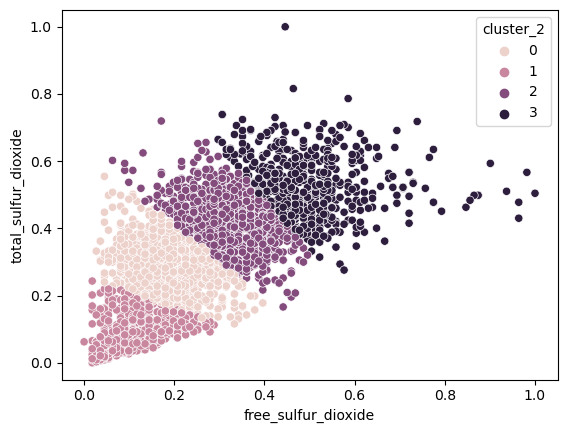

In [17]:
# visualize the clusters: 
sns.scatterplot(x = 'free_sulfur_dioxide', y = 'total_sulfur_dioxide', data = train, hue = 'cluster_2')
plt.show()

In [18]:
V2 = validate[['free_sulfur_dioxide', 'total_sulfur_dioxide']]

#use the thing:  
kmeans.predict(V2)

validate['cluster_2'] = kmeans.predict(V2)

V2['cluster_2'] = kmeans.predict(V2)

validate.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1,cluster_2
5258,0.207792,0.548780,0.2000,0.082515,0.217742,0.297297,0.359050,0.085188,0.396552,0.365854,0.838710,0.833333,0.0,1,2
1531,0.298701,0.762195,0.1250,0.086444,0.580645,0.108108,0.062315,0.577877,0.741379,0.524390,0.354839,0.333333,1.0,2,1
849,0.337662,0.670732,0.2625,0.039293,0.572581,0.099099,0.074184,0.614749,0.724138,0.524390,0.290323,0.333333,1.0,2,1
5709,0.493506,0.390244,0.3375,0.023576,0.354839,0.198198,0.551929,0.280992,0.413793,0.182927,0.580645,0.333333,0.0,1,2
5206,0.389610,0.073171,0.2250,0.031434,0.306452,0.261261,0.246291,0.280992,0.456897,0.378049,0.516129,0.500000,0.0,1,0


In [19]:
T2 = test[['free_sulfur_dioxide', 'total_sulfur_dioxide']]

#use the thing:
kmeans.predict(T2)

#add columns
test['cluster_1'] = kmeans.predict(T2)

T2['cluster_1'] = kmeans.predict(T2)

# Cluster 3: 
- Volatile acidity vs density

In [20]:
X3 = train[['volatile_acidity', 'density']]

#make the thing: 
kmeans = KMeans(n_clusters= 4 )

#fit the thing (ONLY ON TRAIN)
kmeans.fit(X3)

#Use the thing:
kmeans.predict(X3)

array([1, 2, 2, ..., 1, 0, 0], dtype=int32)

In [21]:
# add column to train
train['cluster_3'] = kmeans.predict(X3)

X3['cluster_3'] = kmeans.predict(X3)

train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1,cluster_2,cluster_3
621,0.571429,0.585366,0.2875,0.110020,0.556452,0.117117,0.287834,0.659886,0.465517,0.475610,0.225806,0.333333,1.0,2,0,1
3092,0.545455,0.317073,0.6125,0.330059,0.193548,0.342342,0.513353,0.405594,0.336207,0.182927,0.693548,0.833333,0.0,1,2,2
5926,0.337662,0.195122,0.3250,0.298625,0.362903,0.414414,0.519288,0.518754,0.327586,0.329268,0.241935,0.333333,0.0,0,3,2
661,0.480519,0.414634,0.3875,0.039293,0.572581,0.126126,0.103858,0.672600,0.491379,0.500000,0.161290,0.333333,1.0,2,1,3
1140,0.454545,0.390244,0.3750,0.043222,0.572581,0.288288,0.213650,0.615385,0.577586,0.512195,0.241935,0.500000,1.0,2,0,3


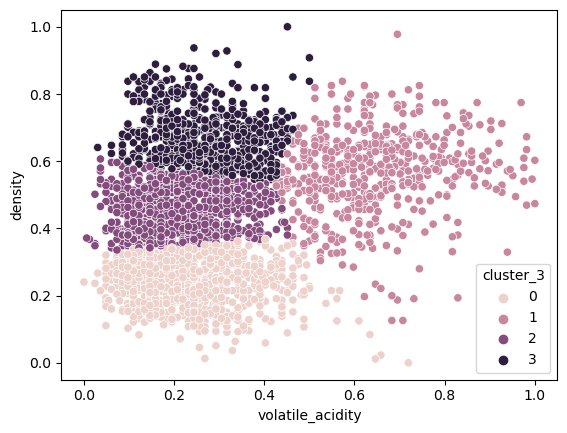

In [22]:
# visualize the clusters: 
sns.scatterplot(x = 'volatile_acidity', y = 'density', data = train, hue = 'cluster_3')
plt.show()

In [23]:
V3 = validate[['volatile_acidity','density']]

#use the thing:  
kmeans.predict(V3)

validate['cluster_3'] = kmeans.predict(V3)

V3['cluster_3'] = kmeans.predict(V3)

validate.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1,cluster_2,cluster_3
5258,0.207792,0.548780,0.2000,0.082515,0.217742,0.297297,0.359050,0.085188,0.396552,0.365854,0.838710,0.833333,0.0,1,2,0
1531,0.298701,0.762195,0.1250,0.086444,0.580645,0.108108,0.062315,0.577877,0.741379,0.524390,0.354839,0.333333,1.0,2,1,1
849,0.337662,0.670732,0.2625,0.039293,0.572581,0.099099,0.074184,0.614749,0.724138,0.524390,0.290323,0.333333,1.0,2,1,1
5709,0.493506,0.390244,0.3375,0.023576,0.354839,0.198198,0.551929,0.280992,0.413793,0.182927,0.580645,0.333333,0.0,1,2,0
5206,0.389610,0.073171,0.2250,0.031434,0.306452,0.261261,0.246291,0.280992,0.456897,0.378049,0.516129,0.500000,0.0,1,0,0


In [24]:
T3 = test[['volatile_acidity', 'density']]

#use the thing:
kmeans.predict(T3)

#add columns
test['cluster_3'] = kmeans.predict(T3)

T3['cluster_3'] = kmeans.predict(T3)

# Cluster 4: 
- Citric Acid vs pH

In [25]:
X4 = train[['citric_acid', 'pH']]

#make the thing: 
kmeans = KMeans(n_clusters= 4 )

#fit the thing (ONLY ON TRAIN)
kmeans.fit(X4)

#Use the thing:
kmeans.predict(X4)

array([0, 3, 1, ..., 0, 1, 1], dtype=int32)

In [26]:
# add column to train
train['cluster_4'] = kmeans.predict(X4)

X4['cluster_4'] = kmeans.predict(X4)

train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1,cluster_2,cluster_3,cluster_4
621,0.571429,0.585366,0.2875,0.110020,0.556452,0.117117,0.287834,0.659886,0.465517,0.475610,0.225806,0.333333,1.0,2,0,1,0
3092,0.545455,0.317073,0.6125,0.330059,0.193548,0.342342,0.513353,0.405594,0.336207,0.182927,0.693548,0.833333,0.0,1,2,2,3
5926,0.337662,0.195122,0.3250,0.298625,0.362903,0.414414,0.519288,0.518754,0.327586,0.329268,0.241935,0.333333,0.0,0,3,2,1
661,0.480519,0.414634,0.3875,0.039293,0.572581,0.126126,0.103858,0.672600,0.491379,0.500000,0.161290,0.333333,1.0,2,1,3,0
1140,0.454545,0.390244,0.3750,0.043222,0.572581,0.288288,0.213650,0.615385,0.577586,0.512195,0.241935,0.500000,1.0,2,0,3,0


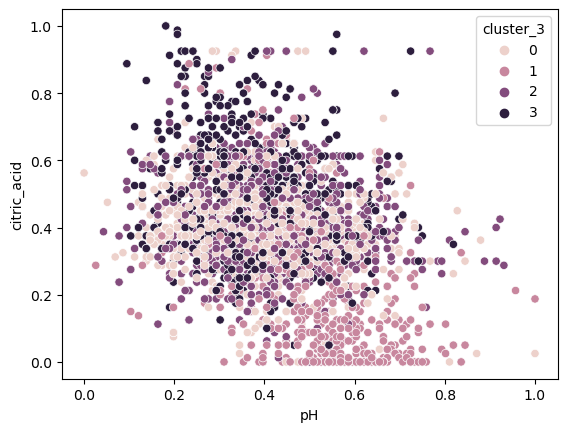

In [27]:
# visualize the clusters: 
sns.scatterplot(x = 'pH', y = 'citric_acid', data = train, hue = 'cluster_3')
plt.show()

In [28]:
V4 = validate[['citric_acid','pH']]

#use the thing:  
kmeans.predict(V4)

validate['cluster_4'] = kmeans.predict(V4)

V4['cluster_4'] = kmeans.predict(V4)

validate.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1,cluster_2,cluster_3,cluster_4
5258,0.207792,0.548780,0.2000,0.082515,0.217742,0.297297,0.359050,0.085188,0.396552,0.365854,0.838710,0.833333,0.0,1,2,0,1
1531,0.298701,0.762195,0.1250,0.086444,0.580645,0.108108,0.062315,0.577877,0.741379,0.524390,0.354839,0.333333,1.0,2,1,1,2
849,0.337662,0.670732,0.2625,0.039293,0.572581,0.099099,0.074184,0.614749,0.724138,0.524390,0.290323,0.333333,1.0,2,1,1,2
5709,0.493506,0.390244,0.3375,0.023576,0.354839,0.198198,0.551929,0.280992,0.413793,0.182927,0.580645,0.333333,0.0,1,2,0,1
5206,0.389610,0.073171,0.2250,0.031434,0.306452,0.261261,0.246291,0.280992,0.456897,0.378049,0.516129,0.500000,0.0,1,0,0,2


In [29]:
T4 = test[['citric_acid', 'pH']]

#use the thing:
kmeans.predict(T4)

#add columns
test['cluster_4'] = kmeans.predict(T4)

T3['cluster_4'] = kmeans.predict(T4)